# Import packages

In [1]:
!pip install wordcloud

In [2]:
#Import useful libraries
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk import FreqDist
from nltk import word_tokenize
import string

from nltk.collocations import *
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lauravlad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lauravlad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import Data

In [3]:
#unzip True.csv file
from zipfile import ZipFile
ZipFile("True.csv.zip").extractall("")

In [4]:
#unzip Fake.csv file.
from zipfile import ZipFile
ZipFile("Fake.csv.zip").extractall("")

# Data Analysis

# True news dataset

In [5]:
#load True.csv and turn it into a dataframe.
df_true = pd.read_csv('True.csv')
print(len(df_true))
df_true.head()

21417


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_true['label'] = 'true'

In [7]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [8]:
df_true = df_true.drop(['date'], axis = 1)


In [9]:
df_true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [10]:
#Find duplicates
duplicateRowsData = df_true[df_true.duplicated()]
duplicateRowsData

,title,text,subject,label
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,true
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,true
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,true
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,true
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,true
...,...,...,...,...
21228,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,true
21263,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,true
21290,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,true
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,true


In [11]:
# Get indexs of the duplicated rows.
duplicateIndex = []
for row in duplicateRowsData.index: 
    duplicateIndex.append(row)
print(duplicateIndex)  
len(duplicateIndex)

[445, 778, 892, 896, 974, 1355, 1471, 1475, 1552, 1841, 1994, 2747, 2830, 3251, 3889, 4033, 4082, 4096, 4149, 4176, 4202, 4227, 4266, 4300, 4342, 4413, 4439, 4443, 4468, 4507, 4565, 4602, 4623, 4651, 4808, 5368, 5572, 6857, 6897, 6969, 7345, 7458, 7655, 7799, 8307, 8505, 8646, 9013, 10477, 10714, 10718, 10811, 10952, 11228, 11246, 11282, 11283, 11284, 11285, 11286, 11287, 11288, 11289, 11290, 11291, 11315, 11623, 11733, 11734, 11735, 11736, 11737, 11738, 11739, 11740, 11741, 11742, 11743, 11744, 11745, 11746, 11747, 11748, 11749, 11750, 11751, 11752, 11753, 11754, 11755, 11756, 11757, 11758, 11759, 11760, 11761, 11762, 11763, 11764, 11765, 11766, 11767, 11768, 11769, 11770, 11771, 11772, 11773, 11774, 11775, 11776, 11777, 11778, 11779, 11780, 11781, 11782, 11783, 11784, 11785, 11786, 11787, 11788, 11789, 11790, 11791, 11792, 11793, 11794, 11795, 11796, 11797, 11798, 11799, 11800, 11801, 11802, 11803, 11804, 11805, 11806, 11807, 11808, 11809, 11810, 11811, 11812, 11813, 11814, 11815, 11

209

In [12]:
df_true = df_true.drop(duplicateIndex)

In [13]:
df_true.head(2)

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,true


In [14]:
#Check again for duplicates
duplicateRowsData = df_true[df_true.duplicated()]
duplicateRowsData

,title,text,subject,label


In [15]:
#set up stopwords, 
STOPWORDS = stopwords.words('english')
STOPWORDS += list(string.punctuation)
STOPWORDS += ['washington', 'reuters']

In [16]:
STOPWORDS = set(STOPWORDS)

In [17]:
#create a new column 'Clean text' and lower cases.
df_true['Clean_text'] = df_true['text'].apply(lambda txt: txt.lower())
df_true.Clean_text[0]

'washington (reuters) - the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, speaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in january. when they return from the holidays on wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the november congressional election campaigns approach in which republicans will seek to keep control of congress. president donald trump and his republicans want a big budget increase in military spending, while democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [18]:
#remove special characters
df_true['Clean_text'] = df_true['Clean_text'].str.replace("[^a-zA-Z' ]","")
#df_true.Clean_text[0]

In [19]:
#remove special characters
df_true['Clean_text'] = df_true['Clean_text'].str.replace(re.compile(r"(^| ).( |$)"), " ")
#df_true.Clean_text[0]

In [20]:
#tokenize
df_true['Clean_text'] = df_true['Clean_text'].str.split()
#dataset.Clean_text[0]

In [21]:
#remove stopwords
df_true['Clean_text'] = df_true['Clean_text'].apply(lambda text: [word for word in text if word not in STOPWORDS])
#df_true.Clean_text[0]

In [22]:
df_true.Clean_text[0]

['head',
 'conservative',
 'republican',
 'faction',
 'us',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'among',
 'republicans',
 'us',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'big',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'also',
 'want',
 'proportional',
 'increases',
 '

In [23]:
#function to replace the n't with not.
def expand_text(text):
    expanded_text = []
    for word in text:
        if re.search("n't", word):
            expanded_text.append(word.split("n't")[0])
            expanded_text.append("not")
        else:
            expanded_text.append(word)
    return expanded_text

In [24]:
#replace "n't" with "not"
df_true['Clean_text'] = df_true['Clean_text'].apply(lambda text: expand_text(text))
#df_true.Clean_text[0]

In [25]:
wordNetLemmatizer = WordNetLemmatizer()
porterStemmer = PorterStemmer()

In [26]:
#Lemanizing words
df_true['Clean_text'] = df_true['Clean_text'].apply(lambda text: [wordNetLemmatizer.lemmatize(word) for word in text])
#df_true.Clean_text[0]

In [27]:
#Stemming the words
df_true['Clean_text'] = df_true['Clean_text'].apply(lambda text: [porterStemmer.stem(word) for word in text])
#df_true.Clean_text[0]

In [28]:
#Combine words back to tweets
df_true['Clean_text'] = df_true['Clean_text'].apply(lambda text: ' '.join(text))
df_true.Clean_text[0]

'head conserv republican faction u congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican u repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pa feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas nondefens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas nondefens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say that enough need give govern pay rais percent fiscal conserv dont see rational eventu run peopl money said meadow among republican vote late decemb parti debtfinanc ta

In [29]:
#compare Tweets with Clean_Tweets
#print(df_true.text[0])
print(df_true.Clean_text[0])

head conserv republican faction u congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican u repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pa feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas nondefens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas nondefens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say that enough need give govern pay rais percent fiscal conserv dont see rational eventu run peopl money said meadow among republican vote late decemb parti debtfinanc tax

In [30]:
#Delete column Tweet, we don't need it anymore.
cleaned_df_true = df_true.drop('text', axis=1 )

In [31]:
cleaned_df_true.head()

,title,subject,label,Clean_text
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,true,head conserv republican faction u congress vot...
1,U.S. military to accept transgender recruits o...,politicsNews,true,transgend peopl allow first time enlist u mili...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,true,special counsel investig link russia presid tr...
3,FBI Russia probe helped by Australian diplomat...,politicsNews,true,trump campaign advis georg papadopoulo told au...
4,Trump wants Postal Service to charge 'much mor...,politicsNews,true,seattlewashington presid donald trump call u p...


In [32]:
#Create a list of all the texts.
true_text = []
for text in df_true['Clean_text']:
    true_text.append(text)


In [33]:
#Create bag of words for positive tweets. Instead of a list of tweets now we'll have a list of words.
true_text_bag = ''.join([str(text) for text in df_true['Clean_text']])
#print(positive_tweets_bag)

Text(0.5, 1.0, 'Most frequent words in true news')

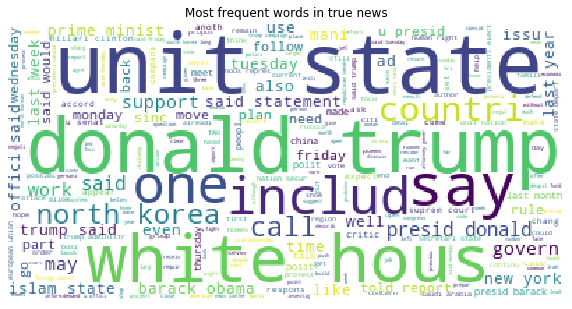

In [34]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(true_text_bag)
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most frequent words in true news")

# Fake news dataset

In [35]:
#load the data and turn it into a dataframe.
df_fake = pd.read_csv('Fake.csv')
print(len(df_fake))
df_fake.head()

23481


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [36]:
df_fake = df_fake.drop(['date'], axis = 1)

In [37]:
df_fake['label'] = 'fake'

In [38]:
df_fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [39]:
#Find duplicates
duplicateRowsData = df_fake[df_fake.duplicated()]
duplicateRowsData

,title,text,subject,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,fake
21848,ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TR...,Because there wouldn t be any outrage over a ...,left-news,fake


In [40]:
# Get indexs of the duplicated rows.
duplicateIndex = []
for row in duplicateRowsData.index: 
    duplicateIndex.append(row)
print(duplicateIndex)  
len(duplicateIndex)

[9942, 11446, 14925, 21848]


4

In [41]:
df_fake = df_fake.drop(duplicateIndex)

In [42]:
#Check again for duplicates
duplicateRowsData = df_fake[df_fake.duplicated()]
duplicateRowsData

,title,text,subject,label


In [43]:
#set up stopwords, 
STOPWORDS = stopwords.words('english')
STOPWORDS += list(string.punctuation)
STOPWORDS += ['washington', 'reuters']

In [44]:
STOPWORDS = set(STOPWORDS)

In [45]:
#create a new column 'Clean text' and lower cases.
df_fake['Clean_text'] = df_fake['text'].apply(lambda txt: txt.lower())
df_fake.Clean_text[0]

'donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year,  president angry pants tweeted.  2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!  donald j. trump (@realdonaldtrump) december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, petty, infantile gibberish? only trump! his lack of decency won t ev

In [46]:
#remove special characters
df_fake['Clean_text'] = df_fake['Clean_text'].str.replace("[^a-zA-Z' ]","")
df_fake.Clean_text[0]

'donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and  the very dishonest fake news media  the former reality show star had just one job to do and he couldn t do it as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year  president angry pants tweeted   will be a great year for america as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year  will be a great year for america  donald j trump realdonaldtrump december  trump s tweet went down about as welll as you d expectwhat kind of president sends a new year s greeting like this despicable petty infantile gibberish only trump his lack of decency won t even allow him to rise above the gutter long eno

In [47]:
#remove special characters
df_fake['Clean_text'] = df_fake['Clean_text'].str.replace(re.compile(r"(^| ).( |$)"), " ")
#df_true.Clean_text[0]

In [48]:
#tokenize
df_fake['Clean_text'] = df_fake['Clean_text'].str.split()
#dataset.Clean_text[0]

In [49]:
#remove stopwords
df_fake['Clean_text'] = df_fake['Clean_text'].apply(lambda text: [word for word in text if word not in STOPWORDS])
df_fake.Clean_text[0]

['donald',
 'trump',
 'wish',
 'americans',
 'happy',
 'new',
 'year',
 'leave',
 'instead',
 'give',
 'shout',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'former',
 'reality',
 'show',
 'star',
 'one',
 'job',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'even',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'new',
 'year',
 'president',
 'angry',
 'pants',
 'tweeted',
 'great',
 'year',
 'america',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'even',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'new',
 'year',
 'great',
 'year',
 'america',
 'donald',
 'trump',
 'realdonaldtrump',
 'december',
 'trump',
 'tweet',
 'went',
 'welll',
 'expectwhat',
 'kind',
 'president',
 'sends',
 'new',
 'year',
 'greeting',
 'like',
 'despicable',
 'petty',
 'infantile',
 'gib

In [50]:
#replace "n't" with "not"
df_fake['Clean_text'] = df_fake['Clean_text'].apply(lambda text: expand_text(text))
#df_true.Clean_text[0]

In [51]:
#Lemanizing words
df_fake['Clean_text'] = df_fake['Clean_text'].apply(lambda text: [wordNetLemmatizer.lemmatize(word) for word in text])
df_fake.Clean_text[0]

['donald',
 'trump',
 'wish',
 'american',
 'happy',
 'new',
 'year',
 'leave',
 'instead',
 'give',
 'shout',
 'enemy',
 'hater',
 'dishonest',
 'fake',
 'news',
 'medium',
 'former',
 'reality',
 'show',
 'star',
 'one',
 'job',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friend',
 'supporter',
 'enemy',
 'hater',
 'even',
 'dishonest',
 'fake',
 'news',
 'medium',
 'happy',
 'healthy',
 'new',
 'year',
 'president',
 'angry',
 'pant',
 'tweeted',
 'great',
 'year',
 'america',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friend',
 'supporter',
 'enemy',
 'hater',
 'even',
 'dishonest',
 'fake',
 'news',
 'medium',
 'happy',
 'healthy',
 'new',
 'year',
 'great',
 'year',
 'america',
 'donald',
 'trump',
 'realdonaldtrump',
 'december',
 'trump',
 'tweet',
 'went',
 'welll',
 'expectwhat',
 'kind',
 'president',
 'sends',
 'new',
 'year',
 'greeting',
 'like',
 'despicable',
 'petty',
 'infantile',
 'gibberish',
 't

In [52]:
#Stemming the words
df_fake['Clean_text'] = df_fake['Clean_text'].apply(lambda text: [porterStemmer.stem(word) for word in text])
df_fake.Clean_text[0]

['donald',
 'trump',
 'wish',
 'american',
 'happi',
 'new',
 'year',
 'leav',
 'instead',
 'give',
 'shout',
 'enemi',
 'hater',
 'dishonest',
 'fake',
 'news',
 'medium',
 'former',
 'realiti',
 'show',
 'star',
 'one',
 'job',
 'countri',
 'rapidli',
 'grow',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friend',
 'support',
 'enemi',
 'hater',
 'even',
 'dishonest',
 'fake',
 'news',
 'medium',
 'happi',
 'healthi',
 'new',
 'year',
 'presid',
 'angri',
 'pant',
 'tweet',
 'great',
 'year',
 'america',
 'countri',
 'rapidli',
 'grow',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friend',
 'support',
 'enemi',
 'hater',
 'even',
 'dishonest',
 'fake',
 'news',
 'medium',
 'happi',
 'healthi',
 'new',
 'year',
 'great',
 'year',
 'america',
 'donald',
 'trump',
 'realdonaldtrump',
 'decemb',
 'trump',
 'tweet',
 'went',
 'welll',
 'expectwhat',
 'kind',
 'presid',
 'send',
 'new',
 'year',
 'greet',
 'like',
 'despic',
 'petti',
 'infantil',
 'gibberish',
 'trump',
 'lack',
 'decenc',

In [53]:
#Combine words back to tweets
df_fake['Clean_text'] = df_fake['Clean_text'].apply(lambda text: ' '.join(text))
df_fake.Clean_text[0]

'donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news medium former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year great year america donald trump realdonaldtrump decemb trump tweet went welll expectwhat kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb us word hater new year wish marlen marlen decemb say h

In [54]:
#compare Tweets with Clean_Tweets
#print(df_true.text[0])
print(df_fake.Clean_text[0])

donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news medium former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year great year america donald trump realdonaldtrump decemb trump tweet went welll expectwhat kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb us word hater new year wish marlen marlen decemb say ha

In [55]:
#Delete column Tweet, we don't need it anymore.
cleaned_df_fake = df_fake.drop('text', axis=1 )

In [56]:
cleaned_df_fake.head()

,title,subject,label,Clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,News,fake,donald trump wish american happi new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,News,fake,hous intellig committe chairman devin nune go ...
2,Sheriff David Clarke Becomes An Internet Joke...,News,fake,friday reveal former milwauke sheriff david cl...
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,fake,christma day donald trump announc would back w...
4,Pope Francis Just Called Out Donald Trump Dur...,News,fake,pope franci use annual christma day messag reb...


In [57]:
#Create a list of all the texts.
fake_text = []
for text in df_fake['Clean_text']:
    fake_text.append(text)

In [58]:
#Create bag of words for positive tweets. Instead of a list of tweets now we'll have a list of words.
fake_text_bag = ''.join([str(text) for text in df_fake['Clean_text']])
#print(positive_tweets_bag)

Text(0.5, 1.0, 'Most frequent words in FAKE NEWS')

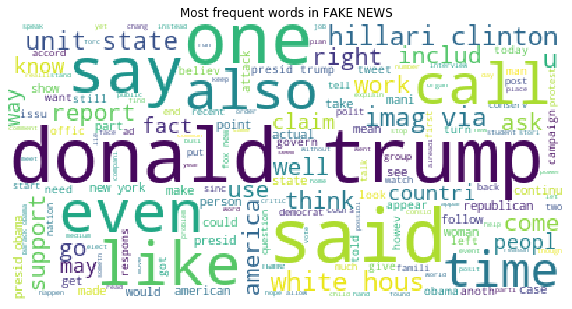

In [59]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(fake_text_bag)
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most frequent words in FAKE NEWS")

In [60]:
cleaned_df = pd.concat([cleaned_df_true, cleaned_df_fake], ignore_index=True)
len(cleaned_df)

44685

In [61]:
len(cleaned_df_fake)

23477

# Saving the cleaned data into csv file
#/Users/lauravlad/Class/Fake-news/fake_or_real_news.csv
cleaned_df.to_csv("/Users/lauravlad/Class/Fake-news/cleaned_df.csv")

In [ ]:
df_guardian = pd.read_csv('the_guardian_file.csv')
print(len(df_guardian))
df_guardian.head(2)

In [ ]:
df_guardian = df_guardian[['title', 'subject', 'text']]

In [ ]:
df_guardian['label'] = 'true'

In [ ]:
df_guardian.columns = ['title', 'subject', 'text', 'label']

In [ ]:
df_guardian.tail()

In [ ]:
len(df_guardian)

In [ ]:
#using sqlite3 create a database to organize list
import sqlite3
#create data base genres.db
conn = sqlite3.connect('articles.db')
#add df_all to our previously created database.
df.to_sql('subject', conn, if_exists='replace', index=False)
pd.read_sql('Select * from subject', conn)

In [ ]:
#commit the changes to our empty database
conn.commit()

In [ ]:
cur = conn.cursor()

In [ ]:
#Pull a data frame with the evolution of a certain type of genre in time
#use groupby to get a data frame with information about fantasy genre
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'fantasy';""")
df_fantasy = pd.DataFrame(cur.fetchall())
df_fantasy.columns = [x[0] for x in cur.description]

In [ ]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'action';""")
df_action = pd.DataFrame(cur.fetchall())
df_action.columns = [x[0] for x in cur.description]
#df_action